'/content/drive/My Drive/Course/Data Science/Datacamp/Customer Analysis and AB Testing'

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd '/content/drive/My Drive/Course/Data Science/Datacamp/Customer Analysis and AB Testing'

/content/drive/My Drive/Course/Data Science/Datacamp/Customer Analysis and AB Testing


In [3]:
ls

Customer_Analysis_and_AB_Testig.ipynb  data/  slides/


In [4]:
ls data

AB_testing_exercise.csv  user_demographics_paywall.csv
daily_revenue.csv        user_demographics_v1.csv
purchase_data_v1.csv


In [0]:
# Import libraries
import pandas as pd
import numpy as np

# Loading & examining our data

In [6]:
# Load the customer_data
customer_data = pd.read_csv('data/user_demographics_v1.csv')

# Load the app_purchases
app_purchases = pd.read_csv('data/purchase_data_v1.csv')

# Print the columns of customer data
print(customer_data.columns)

# Print the columns of app_purchases
print(app_purchases.columns)

Index(['uid', 'reg_date', 'device', 'gender', 'country', 'age'], dtype='object')
Index(['date', 'uid', 'sku', 'price'], dtype='object')


In [0]:
print(customer_data.head(10))

          uid              reg_date device gender country  age
0  54030035.0  2017-06-29T00:00:00Z    and      M     USA   19
1  72574201.0  2018-03-05T00:00:00Z    iOS      F     TUR   22
2  64187558.0  2016-02-07T00:00:00Z    iOS      M     USA   16
3  92513925.0  2017-05-25T00:00:00Z    and      M     BRA   41
4  99231338.0  2017-03-26T00:00:00Z    iOS      M     FRA   59
5  64229733.0  2017-05-17T00:00:00Z    and      F     USA   17
6  16377492.0  2016-10-16T00:00:00Z    and      M     BRA   20
7  36350096.0  2017-04-07T00:00:00Z    and      M     USA   23
8  98955454.0  2016-08-11T00:00:00Z    and      M     USA   22
9  40461463.0  2017-07-16T00:00:00Z    and      M     BRA   32


In [0]:
print(app_purchases.head(10))

         date       uid            sku  price
0  2017-07-10  41195147  sku_three_499    499
1  2017-07-15  41195147  sku_three_499    499
2  2017-11-12  41195147   sku_four_599    599
3  2017-09-26  91591874    sku_two_299    299
4  2017-12-01  91591874   sku_four_599    599
5  2016-12-12  90783242    sku_two_299    299
6  2017-06-12  90783242    sku_one_199    199
7  2017-10-11  90783242   sku_five_899    899
8  2017-10-27  90783242   sku_four_599    599
9  2018-01-04  90783242    sku_one_199    199


# Merging on different sets of fields

In [0]:
customer_data = customer_data.rename(columns = {'reg_date': 'date'})
print(customer_data.columns)

Index(['uid', 'date', 'device', 'gender', 'country', 'age'], dtype='object')


In [0]:
customer_data.date = customer_data.date.astype(str).map(lambda x: x.split('T')[0]).astype('object')

In [0]:
# Merge on the 'uid' and 'date' field
uid_date_combined_data = app_purchases.merge(customer_data, on=['uid', 'date'], how='inner')

# Examine the results 
print(uid_date_combined_data.head())
print(len(uid_date_combined_data))

         date       uid             sku  price device gender country  age
0  2016-03-30  94055095    sku_four_599    599    iOS      F     BRA   16
1  2015-10-28  69627745     sku_one_199    199    and      F     BRA   18
2  2017-02-02  11604973  sku_seven_1499    499    and      F     USA   16
3  2016-06-05  22495315    sku_four_599    599    and      F     USA   19
4  2018-02-17  51365662     sku_two_299    299    iOS      M     TUR   16
35


## Set potential KPIs

In [0]:
grouped_purchase_data = uid_date_combined_data.groupby(by = ['device', 'gender'])
purchase_summary= grouped_purchase_data.agg({'price': ['mean', 'median', 'std']})
print(purchase_summary)

                    price                   
                     mean median         std
device gender                               
and    F       477.571429    499  200.685638
       M       511.500000    549  229.518129
iOS    F       427.571429    599  221.466971
       M       449.000000    499  164.316767


 calculate the average amount paid per purchase within a user's first 28 days.
 
 This KPI can provide a sense of the popularity of different in-app purchase price points to users within their first month.

In [0]:
purchase_data = customer_data.rename(columns = {'date':'reg_date'}).merge(app_purchases, on = 'uid', how = 'inner')
purchase_data.shape

(9006, 9)

In [0]:
purchase_data.reg_date = pd.to_datetime(purchase_data.reg_date)
print(purchase_data.reg_date.dtype)
print(purchase_data.reg_date[:10])

datetime64[ns]
0   2017-05-25
1   2017-05-25
2   2017-05-25
3   2017-05-25
4   2016-10-16
5   2016-10-16
6   2016-10-16
7   2017-04-07
8   2017-04-07
9   2017-04-07
Name: reg_date, dtype: datetime64[ns]


In [0]:
purchase_data.date = pd.to_datetime(purchase_data.date)
print(purchase_data.date.dtype)
print(purchase_data.date[:10])

datetime64[ns]
0   2017-10-20
1   2017-05-29
2   2017-08-23
3   2018-03-26
4   2018-03-17
5   2017-02-06
6   2017-03-01
7   2017-04-21
8   2017-06-04
9   2017-07-12
Name: date, dtype: datetime64[ns]


In [0]:
import datetime

# Compute max_purchase_date
current_date = pd.to_datetime('2018-3-17')
max_purchase_date = current_date - datetime.timedelta(days=28)

# Filter to only include users who registered before our max date
purchase_data_filt = purchase_data[purchase_data.reg_date < max_purchase_date]

# Filter to contain only purchases within the first 28 days of registration
purchase_data_filt = purchase_data_filt[(purchase_data_filt.date <= 
                        purchase_data_filt.reg_date + datetime.timedelta(days=28))]

# Output the mean price paid per purchase
print(purchase_data_filt.price.mean())

414.4237288135593


# Average purchase price by cohort

Building on the previous exercise, let's look at the same KPI, average purchase price, and a similar one, median purchase price, within the first 28 days. Additionally, let's look at these metrics not limited to 28 days to compare.

We can calculate these metrics across a set of cohorts and see what differences emerge. This is a useful task as it can help us understand how behaviors vary across cohorts.

Note that in our data the price variable is given in cents.

In [0]:
# Set the max registration date to be one month before today
max_reg_date = current_date - datetime.timedelta(days=28)

# Find the month 1 values
month1 = np.where((purchase_data.reg_date < max_reg_date) &
                 (purchase_data.date < purchase_data.reg_date + datetime.timedelta(days=28)),
                  purchase_data.price, 
                  np.NaN)
                 
# Update the value in the DataFrame
purchase_data['month1'] = month1

# Group the data by gender and device 
purchase_data_upd = purchase_data.groupby(by=['gender', 'device'], as_index=False) 

# Aggregate the month1 and price data 
purchase_summary = purchase_data_upd.agg(
                        {'month1': ['mean', 'median'],
                        'price': ['mean', 'median']})

# Examine the results 
print(purchase_summary)

  gender device      month1              price       
                       mean median        mean median
0      F    and  388.204545  299.0  400.747504    299
1      F    iOS  432.587786  499.0  404.435330    299
2      M    and  413.705882  399.0  416.237308    499
3      M    iOS  433.313725  499.0  405.272401    299


# Plotting time series data
In trying to boost purchases, we have made some changes to our introductory in-app purchase pricing. In this exercise, you will check if this is having an impact on the number of purchases made by purchasing users during their first week.

The dataset user_purchases has been joined to the demographics data and properly filtered. The column 'first_week_purchases' that is 1 for a first week purchase and 0 otherwise has been added. This column is converted to the average number of purchases made per day by users in their first week.

We will try to view the impact of this change by looking at a graph of purchases as described in the instructions.

The dataset provided on Datacamp ide is different from its data source. The data 'user_purchases' on Datacamp has  (92027, 11) shape.

In [57]:
ls data

AB_testing_exercise.csv  user_demographics_paywall.csv
daily_revenue.csv        user_demographics_v1.csv
purchase_data_v1.csv


In [0]:
from functools import wraps
import time

def timmer(func):
	'Return the value (in fractional seconds) of a performance counter.'

	@wraps(func)
	def wrapper_timmer(*args, **kwargs):

		t1 = time.perf_counter()
		result = func(*args, **kwargs)
		t2 = time.perf_counter()
		run_time=t2-t1
		print(f'Function {func.__name__} used {run_time: .4f} secs.')
		return result

	return wrapper_timmer

In [65]:
@timmer
def read_nlines(file_name):
  num_lines = sum(1 for line in open(file_name))
  print(f'total number of lines in {file_name} is {num_lines}')

from os import listdir
files = listdir('data')
print(files)
len(files)

for file in files:
  print('\n')
  read_nlines('data/'+ file)

['user_demographics_v1.csv', 'purchase_data_v1.csv', 'daily_revenue.csv', 'user_demographics_paywall.csv', 'AB_testing_exercise.csv']


total number of lines in data/user_demographics_v1.csv is 10001
Function read_nlines used  0.0066 secs.


total number of lines in data/purchase_data_v1.csv is 9007
Function read_nlines used  0.0044 secs.


total number of lines in data/daily_revenue.csv is 48001
Function read_nlines used  0.0155 secs.


total number of lines in data/user_demographics_paywall.csv is 1101
Function read_nlines used  0.0012 secs.


total number of lines in data/AB_testing_exercise.csv is 45884
Function read_nlines used  0.0097 secs.


In [44]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Merge on the 'uid' field
uid_combined_data = app_purchases.merge(customer_data, on=['uid'], how='left')

# Examine the results 
print(uid_combined_data.head())
print(uid_combined_data.shape)

         date       uid            sku  price              reg_date device gender country  age
0  2017-07-10  41195147  sku_three_499    499  2017-06-26T00:00:00Z    and      M     BRA   17
1  2017-07-15  41195147  sku_three_499    499  2017-06-26T00:00:00Z    and      M     BRA   17
2  2017-11-12  41195147   sku_four_599    599  2017-06-26T00:00:00Z    and      M     BRA   17
3  2017-09-26  91591874    sku_two_299    299  2017-01-05T00:00:00Z    and      M     TUR   17
4  2017-12-01  91591874   sku_four_599    599  2017-01-05T00:00:00Z    and      M     TUR   17
(9006, 9)


In [46]:
import datetime

uid_combined_data.reg_date=pd.to_datetime(uid_combined_data.reg_date.map(lambda x: x.split('T')[0]),format='%Y-%m-%d')
uid_combined_data['first_week_purchases']=pd.to_datetime(uid_combined_data.date) < uid_combined_data.reg_date + datetime.timedelta(days=7)
uid_combined_data['first_week_purchases']=uid_combined_data['first_week_purchases'].astype(int)
uid_combined_data.head()

,date,uid,sku,price,reg_date,device,gender,country,age,first_week_purchases
0,2017-07-10,41195147,sku_three_499,499,2017-06-26,and,M,BRA,17,0
1,2017-07-15,41195147,sku_three_499,499,2017-06-26,and,M,BRA,17,0
2,2017-11-12,41195147,sku_four_599,599,2017-06-26,and,M,BRA,17,0
3,2017-09-26,91591874,sku_two_299,299,2017-01-05,and,M,TUR,17,0
4,2017-12-01,91591874,sku_four_599,599,2017-01-05,and,M,TUR,17,0


In [66]:
uid_combined_data.shape

(9006, 10)

In [0]:
user_purchases = uid_combined_data.copy()

# Group the data and aggregate first_week_purchases
user_purchases = user_purchases.groupby(by=['reg_date', 'uid']).agg({'first_week_purchases': ['sum']})

# Reset the indexes
user_purchases.columns = user_purchases.columns.droplevel(level=1)
user_purchases.reset_index(inplace=True)

# Find the average number of purchases per day by first-week users
user_purchases = user_purchases.groupby(by=['reg_date']).agg({'first_week_purchases': ['mean']})
user_purchases.columns = user_purchases.columns.droplevel(level=1)
user_purchases.reset_index(inplace=True)

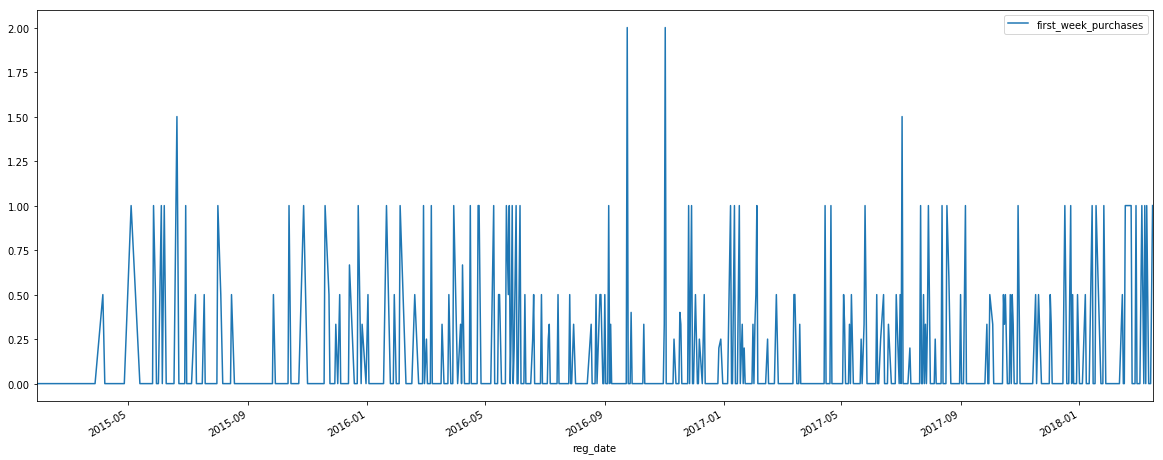

In [54]:
# Plot the results
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 8));
user_purchases.plot(x='reg_date', y='first_week_purchases', ax = plt.gca())
plt.show()